In [8]:
import numpy as np 
import os 
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('C:/Users/N.SREENIVASARAO/Documents/Anaconda-navigator/leapGestRecog'):
    if not j.startswith('.'): 
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'00': 0,
 '01': 1,
 '02': 2,
 '03': 3,
 '04': 4,
 '05': 5,
 '06': 6,
 '07': 7,
 '08': 8,
 '09': 9,
 'leapGestRecog': 10}

In [23]:
import os
from PIL import Image
import numpy as np

x_data = []
y_data = []
datacount = 0

# Updated lookup dictionary
lookup = {'00': 0, '01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6, '07': 7, '08': 8, '09': 9, 'leapGestRecog': 10}

for i in range(10):
    for j in os.listdir('C:/Users/N.SREENIVASARAO/Documents/Anaconda-navigator/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir('C:/Users/N.SREENIVASARAO/Documents/Anaconda-navigator/leapGestRecog/0' + str(i) + '/' + j + '/'):
                img = Image.open('C:/Users/N.SREENIVASARAO/Documents/Anaconda-navigator/leapGestRecog/0' + str(i) + '/' + j + '/' + k).convert('L')
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr)

                # Extract the numeric label from the subdirectory name
                label_numeric = int(j.split('_')[0])
                y_values = np.full((1, 1), label_numeric)
                y_data.append(y_values)

                count = count + 1
            datacount = datacount + count

x_data = np.array(x_data, dtype='float32')
y_data = np.concatenate(y_data, axis=0)


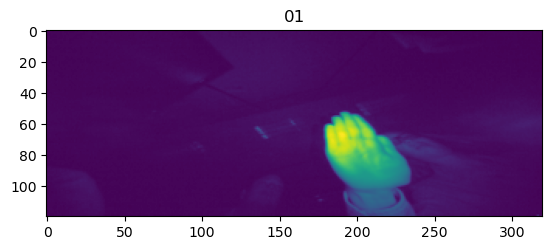

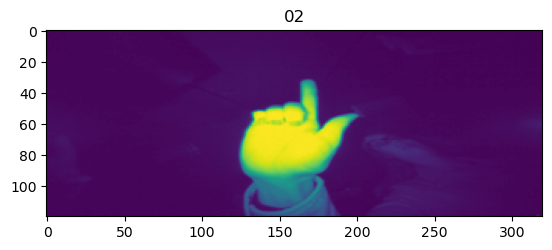

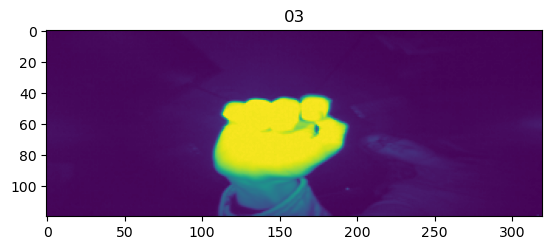

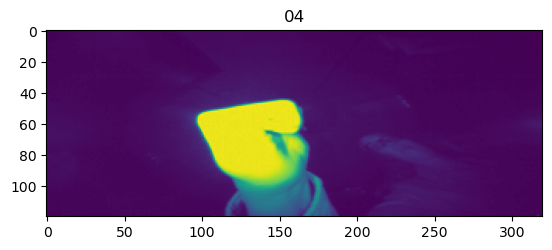

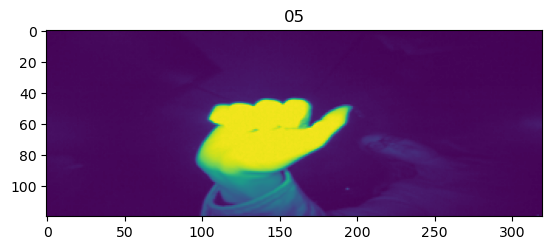

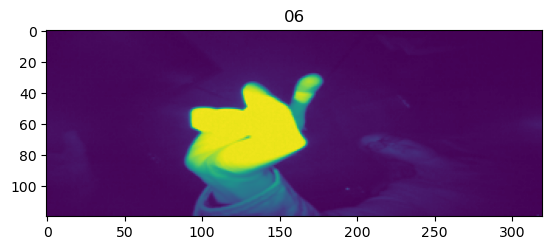

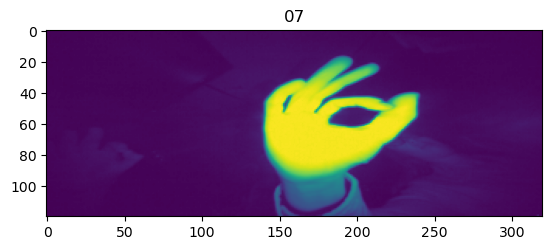

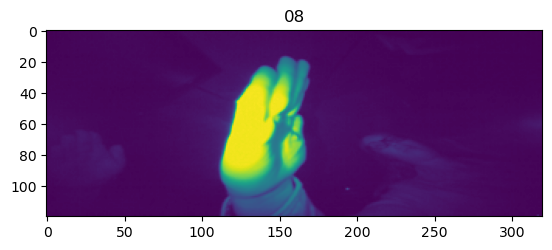

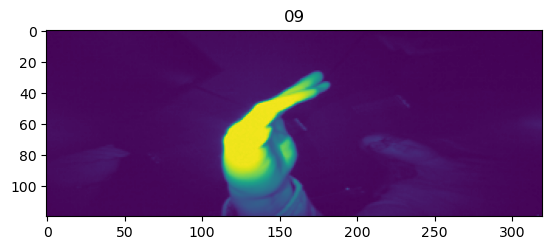

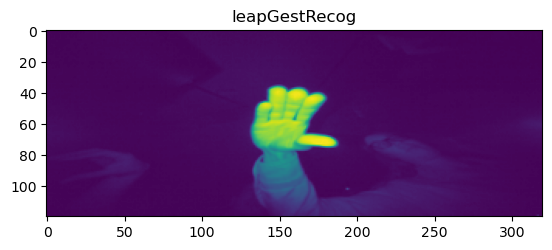

In [24]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [28]:
# Install TensorFlow using the following magic command
!pip install tensorflow


import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Assuming y_data is a 1D array containing numeric labels
# If y_data is already a 2D array, adjust the input shape parameter accordingly
y_data_categorical = to_categorical(y_data, num_classes=len(set(y_data)))

# Continue with your code using y_data_categorical


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ----------------------------------- ---- 51.2

TypeError: unhashable type: 'numpy.ndarray'

In [29]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255  

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [31]:
from keras import layers
from keras import models

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [43]:
from keras.utils import to_categorical

# Assuming y_train and y_validate are your original label arrays
num_classes = 10
y_train_encoded = to_categorical(y_train - 1, num_classes=num_classes)
y_validate_encoded = to_categorical(y_validate - 1, num_classes=num_classes)
model.add(layers.Dense(num_classes, activation='softmax'))


In [48]:
from keras.optimizers import RMSprop


# Compiling the model
model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now training the model
model.fit(x_train, y_train_encoded, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate_encoded))

[loss, acc] = model.evaluate(x_test, y_test_encoded, verbose=1)

Epoch 1/10
250/250 [==============================] - 132s 514ms/step - loss: 0.3494 - accuracy: 0.8869 - val_loss: 0.0059 - val_accuracy: 0.9985
Epoch 2/10
250/250 [==============================] - 127s 507ms/step - loss: 0.0173 - accuracy: 0.9956 - val_loss: 0.0053 - val_accuracy: 0.9985
Epoch 3/10
250/250 [==============================] - 128s 514ms/step - loss: 0.0079 - accuracy: 0.9983 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 4/10
250/250 [==============================] - 123s 492ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 132s 528ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 7.7738e-05 - val_accuracy: 1.0000
Epoch 6/10
250/250 [==============================] - 138s 553ms/step - loss: 5.8840e-05 - accuracy: 1.0000 - val_loss: 3.5156e-05 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 137s 547ms/step - loss: 2.2170e-06 - accuracy: 1.0000 - va

In [50]:
[loss, acc] = model.evaluate(x_test, y_test_encoded, verbose=1)

63/63 [==============================] - 8s 125ms/step - loss: 9.9180e-04 - accuracy: 0.9995


In [51]:
print("Accuracy:" + str(acc))

Accuracy:0.9964898775346581
